In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

ROOT = "/content/drive/MyDrive/cv_task/"
os.chdir(ROOT)

In [ ]:
!pip install ultralytics

In [4]:
from ultralytics import YOLO, YOLOWorld
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = YOLOWorld("yolov8s-world.pt")  # or select yolov8m/l-world.pt for different sizes

# Define custom classes
model.set_classes(["screw"])

In [6]:
# Execute prediction for specified categories on an image
results = model.predict(source="/content/drive/MyDrive/cv_task/CountingChallenge/Screws_2024_07_15/img6.jpg", show=False, conf=0.00001, iou=0.5)



image 1/1 /content/drive/MyDrive/cv_task/CountingChallenge/Screws_2024_07_15/img6.jpg: 384x640 45 screws, 887.9ms
Speed: 16.0ms preprocess, 887.9ms inference, 14.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


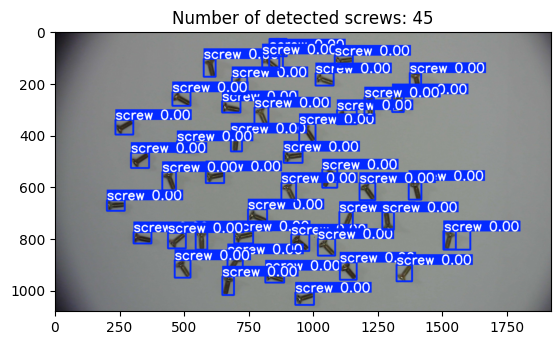

In [10]:
# Count the detected objects
count = len(results[0].boxes.xyxy)
plt.title(f"Number of detected screws: {count}")
# Display the image
plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
plt.show()

### Training a segmentation model using a dataset from Roboflow


In [ ]:
# Unzip using python
from zipfile import ZipFile

zip_file = "Nuts and Bolts.v2i.yolov8-obb.zip"

def unzip(zip_file, output="datasets"):
    if not os.path.exists(output):
        os.makedirs(output)
        with ZipFile(zip_file, 'r') as zip:
            zip.extractall(output)
    print("Unzip done")

unzip(zip_file)

Unzip done


In [ ]:
# Load a model
model = YOLO("yolov8n-seg.yaml")  # build a new model from YAML
model = YOLO("yolov8n-seg.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolov8n-seg.yaml").load("yolov8n.pt")  # build from YAML and transfer weights


Transferred 355/417 items from pretrained weights


In [ ]:
# Train the model
os.chdir(os.path.join(ROOT, "datasets"))
results = model.train(data="data.yaml", epochs=100, imgsz=640)

Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 6.25M/6.25M [00:00<00:00, 182MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/cv_task/datasets/train/labels... 75 images, 1 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 110.45it/s]


train: New cache created: /content/drive/MyDrive/cv_task/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/cv_task/datasets/valid/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 49.42it/s]


val: New cache created: /content/drive/MyDrive/cv_task/datasets/valid/labels.cache
Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.26G      1.452      12.28      3.835      1.233         95        640: 100%|██████████| 5/5 [00:08<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]

                   all         15        101    0.00401      0.111    0.00993    0.00405    0.00125     0.0347    0.00118   0.000439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.79G      1.445      11.33      3.838      1.261         99        640: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         15        101    0.00627      0.146     0.0407     0.0188    0.00388     0.0903      0.019    0.00524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.01G      1.355      5.316      3.668      1.212         65        640: 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         15        101     0.0111      0.426      0.212      0.119    0.00718      0.321     0.0961     0.0252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.86G      1.353      3.878      2.635      1.094        105        640: 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         15        101     0.0196      0.848      0.343      0.181     0.0157      0.752      0.245     0.0726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.86G      1.313      3.241      2.106      1.054         77        640: 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         15        101      0.992      0.208      0.338       0.18      0.948      0.189       0.27     0.0785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.27G      1.275      2.933      1.774      1.068         80        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all         15        101     0.0218      0.837      0.331      0.186     0.0212      0.876      0.288     0.0841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.81G      1.284      2.661      1.707      1.117         68        640: 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         15        101      0.021      0.769      0.239      0.127     0.0202      0.773      0.218     0.0836



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.83G      1.209      2.528      1.643      1.082         73        640: 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         15        101      0.945      0.106      0.236      0.107      0.541      0.201      0.207     0.0836



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.89G      1.238      2.401      1.641      1.088         51        640: 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         15        101       0.98     0.0556      0.466      0.289       0.89     0.0417      0.424      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.92G       1.22      2.332      1.464      1.073         83        640: 100%|██████████| 5/5 [00:02<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         15        101       0.98      0.118      0.547      0.327      0.943      0.104      0.525      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.89G      1.202      2.341      1.328      1.044         82        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         15        101      0.977     0.0927      0.701      0.414       0.93     0.0788      0.685      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.88G      1.171      2.201       1.34      1.069         68        640: 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         15        101      0.968      0.104      0.775      0.461      0.948     0.0972      0.792      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.87G      1.153      2.203      1.313      1.042        158        640: 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         15        101      0.964      0.111      0.832      0.506      0.945      0.104      0.835      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.86G      1.207      2.164      1.371      1.067        100        640: 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         15        101          1      0.144      0.802       0.52          1      0.144      0.811      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.92G      1.145      2.223      1.214      1.045        100        640: 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         15        101      0.943      0.447      0.898      0.596      0.943      0.447        0.9      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.95G      1.109        2.1      1.245      1.043        127        640: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         15        101      0.902      0.418      0.863      0.571      0.923      0.424       0.89      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.79G      1.183      2.074      1.359      1.073         86        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         15        101      0.732      0.437      0.744       0.47      0.779      0.459      0.785      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.9G      1.181      2.172      1.259      1.062         66        640: 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         15        101      0.743      0.621      0.786      0.487      0.756      0.623      0.806      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.96G      1.206      2.086      1.234      1.045         73        640: 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         15        101      0.898      0.729      0.933      0.599      0.904      0.736      0.935      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.05G      1.166      2.149      1.146      1.064         80        640: 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         15        101      0.888      0.789      0.968      0.624      0.896      0.797      0.976      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100         3G      1.094      1.938      1.073      1.049         67        640: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         15        101      0.853      0.857      0.978      0.646      0.853      0.857      0.978      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.91G      1.075      2.062      1.082      1.047         81        640: 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         15        101      0.925      0.897      0.983      0.643      0.925      0.897      0.983       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.84G      1.119      1.858      1.072      1.036        113        640: 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         15        101      0.929      0.914      0.981      0.666      0.929      0.914      0.981      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.86G      1.183      2.002      1.166      1.101         68        640: 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         15        101      0.909       0.84      0.968      0.644       0.91      0.841      0.967      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.85G      1.074      1.919      1.102      1.015         79        640: 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         15        101      0.929      0.925      0.983      0.662      0.923      0.918      0.971      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.08G      1.119      2.063      1.045      1.045         79        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         15        101      0.972      0.965      0.983      0.653      0.972      0.965      0.983      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.9G      1.094      2.053      1.013       1.02         90        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         15        101      0.967      0.968       0.98      0.627      0.967      0.968       0.98      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100         3G      1.106       2.09     0.9959       1.03         77        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         15        101      0.872      0.889       0.98      0.627      0.872      0.889       0.98       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.98G       1.08      1.841     0.9763       1.02         87        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         15        101      0.869      0.867      0.961      0.594      0.878      0.874      0.976      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.85G      1.038      1.911     0.9591      1.002         78        640: 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         15        101      0.949      0.943      0.967      0.616      0.957      0.951      0.983      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.85G       1.07       1.94     0.9294      1.009         93        640: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         15        101      0.956      0.961      0.982      0.644      0.956      0.961      0.982       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.95G      1.031      1.801     0.9416     0.9967        133        640: 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         15        101       0.95      0.978      0.983      0.628       0.95      0.978      0.983      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.87G      1.091      2.155     0.9902      1.059         81        640: 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         15        101      0.951      0.981      0.983      0.622      0.951      0.981      0.983      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.94G      1.078      1.884      1.012      1.034         91        640: 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         15        101      0.952      0.993      0.981      0.653      0.952      0.993      0.981      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.79G      1.048      1.864      1.037      1.025         52        640: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         15        101      0.955      0.975      0.972       0.64      0.962      0.982      0.981       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.89G      1.035      1.813      0.977     0.9943         71        640: 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         15        101      0.954      0.979      0.966      0.647      0.961      0.986      0.978      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.74G      1.058      1.841     0.9662      1.019        100        640: 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         15        101      0.931      0.977      0.963      0.638      0.938      0.984      0.975      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.97G     0.9987      1.767     0.9167     0.9821         92        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         15        101      0.947      0.967      0.959      0.613      0.955      0.974      0.971      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.94G     0.9994       1.76     0.8656      1.005        110        640: 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         15        101      0.953      0.964      0.959      0.631      0.968      0.978      0.974      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.91G      1.006      1.892     0.9055      1.003         65        640: 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         15        101      0.966      0.984      0.978      0.638      0.973      0.991      0.987      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100         3G      1.001      1.754     0.8865     0.9926         84        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         15        101      0.975      0.991      0.987      0.622      0.975      0.991      0.987      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.97G      1.001      1.699     0.8849     0.9895        116        640: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         15        101      0.975       0.99      0.988      0.627      0.975       0.99      0.988      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.87G      1.023      1.827     0.8868      1.018         60        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         15        101      0.968      0.991      0.988      0.636      0.968      0.991      0.988      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.97G      1.017      1.797     0.9317      1.014        166        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         15        101      0.976       0.97      0.983      0.661      0.976       0.97      0.983      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.88G     0.9364      1.657     0.8397     0.9919         89        640: 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         15        101      0.961      0.964      0.967      0.654      0.976      0.979       0.98      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.84G      1.039      1.792     0.8489      1.016        107        640: 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         15        101      0.977      0.979       0.98      0.664      0.977      0.979       0.98      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.89G     0.9949      1.704     0.8411      1.003         87        640: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         15        101      0.966      0.978       0.98      0.658      0.966      0.978       0.98      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.87G     0.9807      1.767     0.8374     0.9991         76        640: 100%|██████████| 5/5 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         15        101      0.977      0.989       0.98      0.674      0.977      0.989       0.98      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.8G     0.9201      1.586     0.8227     0.9766         86        640: 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         15        101      0.972      0.983      0.976      0.664       0.98      0.991       0.98      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.84G     0.9642      1.643     0.8303      0.989         76        640: 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         15        101      0.978       0.99      0.985      0.673      0.978       0.99      0.986      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.8G     0.9666      1.579     0.7816     0.9667         86        640: 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         15        101      0.989      0.989      0.987      0.684      0.989      0.989      0.988      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.86G      0.891      1.563     0.7746     0.9582         71        640: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         15        101      0.974      0.986      0.979      0.682      0.981      0.993      0.988      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.94G       1.01      1.909     0.8517      1.032         85        640: 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         15        101      0.984      0.992      0.988      0.687      0.984      0.992      0.988      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.01G     0.9127      1.665     0.7968     0.9731         69        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         15        101      0.983      0.985      0.988      0.691      0.983      0.985      0.988      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.87G      0.903      1.716     0.8137      1.006         59        640: 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         15        101      0.981      0.984      0.988      0.685      0.981      0.984      0.988      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.82G     0.9139      1.537     0.7718     0.9671         96        640: 100%|██████████| 5/5 [00:02<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         15        101      0.968      0.973      0.983      0.642      0.976      0.981      0.987      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.03G      0.938      1.652     0.7658     0.9828         95        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         15        101       0.97      0.976      0.981      0.655      0.978      0.983      0.986      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.02G     0.9131      1.699     0.7477     0.9737        105        640: 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         15        101      0.984      0.985      0.986       0.67      0.984      0.985      0.986      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.87G      0.917      1.535     0.7773     0.9689         52        640: 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         15        101      0.985      0.984      0.986      0.667      0.985      0.984      0.986      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.84G     0.8726      1.597     0.7385     0.9606         65        640: 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         15        101      0.974      0.978      0.981       0.66      0.982      0.985      0.985      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.87G     0.9021      1.549      0.761     0.9553         46        640: 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         15        101      0.966      0.971      0.972      0.646      0.981      0.985      0.986      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.95G     0.9057      1.618     0.7427     0.9573        116        640: 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         15        101      0.972      0.987      0.988      0.657      0.972      0.987      0.988      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.01G     0.8449      1.567     0.7162     0.9229         79        640: 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         15        101      0.963      0.968      0.973      0.638      0.978      0.982      0.988      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.96G     0.8548      1.555     0.7183     0.9619         66        640: 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         15        101      0.956      0.966      0.971       0.66      0.971      0.981      0.986      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100       2.8G     0.9002      1.599     0.7653     0.9674         42        640: 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         15        101      0.971       0.98      0.986       0.66      0.971       0.98      0.986       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.92G     0.9178      1.641     0.7194     0.9749         80        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         15        101      0.973      0.984      0.987      0.659      0.973      0.984      0.987      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.83G      0.826      1.503     0.6898     0.9312        121        640: 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         15        101      0.978      0.978      0.987      0.652      0.978      0.978      0.987       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.94G     0.8746       1.57     0.7033     0.9722         91        640: 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         15        101      0.986      0.982      0.988      0.671      0.986      0.982      0.988      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.96G     0.8668      1.556      0.738     0.9448        100        640: 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         15        101      0.988      0.985      0.988      0.673      0.988      0.985      0.988      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.87G     0.8498      1.488     0.7394     0.9509         69        640: 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         15        101      0.989      0.985      0.988      0.682      0.989      0.985      0.988       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.83G     0.8382      1.481     0.6814     0.9505         89        640: 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         15        101      0.991      0.977      0.986      0.674      0.991      0.977      0.986      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.78G     0.8678        1.5     0.6885     0.9715         69        640: 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         15        101      0.978      0.987      0.986      0.665      0.978      0.987      0.986      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.92G     0.9248       1.55      0.717     0.9782         50        640: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         15        101      0.981      0.984      0.986      0.665      0.981      0.984      0.986      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.97G     0.8511       1.42     0.6927      0.949         74        640: 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         15        101      0.974      0.987      0.985      0.662      0.974      0.987      0.985      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.84G     0.8102      1.452     0.6621      0.921         76        640: 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         15        101      0.981      0.985      0.985      0.662      0.981      0.985      0.985      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.95G     0.8367      1.388     0.6905      0.941         66        640: 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         15        101       0.98      0.984      0.986      0.663       0.98      0.984      0.986       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.96G     0.8177      1.406     0.6816     0.9311        114        640: 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         15        101      0.979      0.985      0.987      0.673      0.979      0.985      0.987      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.81G     0.8113       1.44     0.6596     0.9186         87        640: 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all         15        101      0.979      0.981      0.986      0.666      0.979      0.981      0.986       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.84G     0.7985      1.474     0.6695     0.9193         77        640: 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         15        101      0.984       0.98      0.985      0.663      0.984       0.98      0.985       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.89G     0.7904      1.437     0.6606     0.9352         42        640: 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         15        101      0.985      0.979      0.985       0.67      0.985      0.979      0.985      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.08G      0.805      1.498     0.6605     0.9314        109        640: 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         15        101      0.986      0.985      0.985      0.672      0.986      0.985      0.985      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.79G     0.7966      1.507     0.6924     0.9282         75        640: 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         15        101      0.986      0.986      0.985       0.67      0.986      0.986      0.985      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.93G     0.8114      1.556     0.6608     0.9425        149        640: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         15        101      0.987      0.985      0.985      0.668      0.987      0.985      0.985      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.83G     0.7536      1.364     0.6182     0.9174         85        640: 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         15        101      0.984      0.986      0.986      0.669      0.984      0.986      0.986      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.93G     0.7837      1.457     0.6236     0.9305         87        640: 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         15        101      0.982      0.986      0.987      0.673      0.982      0.986      0.987      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.99G     0.7347       1.34     0.6265     0.9052        109        640: 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         15        101      0.983      0.986      0.987      0.679      0.983      0.986      0.987      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.97G     0.8068      1.495     0.6553     0.9317         71        640: 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         15        101      0.986      0.986      0.988      0.683      0.986      0.986      0.988      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100       2.9G     0.7555      1.424     0.6351      0.915         57        640: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         15        101       0.99      0.987      0.988      0.677       0.99      0.987      0.988       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.02G     0.7271       1.39     0.5995     0.8967        129        640: 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         15        101      0.989      0.987      0.988      0.678      0.989      0.987      0.988      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.88G     0.7275      1.264     0.6056     0.9025         76        640: 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         15        101      0.987      0.988      0.988      0.677      0.987      0.988      0.988      0.624


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.86G     0.6526      1.281     0.5853     0.8959         54        640: 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.56s/it]

                   all         15        101      0.987      0.988      0.988      0.676      0.987      0.988      0.988      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.68G     0.6992      1.316     0.6007     0.9142         79        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         15        101      0.985      0.986      0.987      0.684      0.985      0.986      0.987      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.76G     0.6424      1.227     0.5839     0.8728         53        640: 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         15        101      0.985      0.985      0.987      0.681      0.985      0.985      0.987      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.84G      0.648      1.202     0.5818     0.8501         37        640: 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         15        101      0.985      0.984      0.987      0.674      0.985      0.984      0.987      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.74G     0.6507      1.225     0.5846     0.8648         41        640: 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         15        101      0.984      0.985      0.987      0.678      0.984      0.985      0.987      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.73G     0.6781      1.279     0.5716     0.9097         49        640: 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         15        101      0.985      0.985      0.987      0.684      0.985      0.985      0.987       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.74G     0.6724      1.332     0.5906     0.8977         50        640: 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         15        101      0.986      0.985      0.987      0.684      0.986      0.985      0.987      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100       2.8G     0.6443      1.238     0.5624     0.8746         68        640: 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         15        101      0.986      0.984      0.987      0.675      0.986      0.984      0.987      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.75G     0.6816      1.268     0.5912     0.8842         41        640: 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         15        101      0.987      0.985      0.987      0.673      0.987      0.985      0.987       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.81G     0.6379      1.215     0.5684     0.8651         74        640: 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         15        101      0.987      0.986      0.987      0.669      0.987      0.986      0.987      0.616



100 epochs completed in 0.113 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 6.8MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


                   all         15        101      0.989      0.989      0.987      0.684      0.989      0.989      0.988      0.643
                 Screw         11         48      0.979      0.968      0.972      0.619      0.979      0.968      0.974      0.513
                   Nut         10         43      0.996          1      0.995      0.679      0.996          1      0.995      0.689
                washer          5         10      0.993          1      0.995      0.754      0.993          1      0.995      0.728
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/segment/train2


In [ ]:
img_path = "/content/drive/MyDrive/cv_task/CountingChallenge/Screws_2024_07_15/img2.jpg"
results = model(img_path)  # predict on an image


image 1/1 /content/drive/MyDrive/cv_task/CountingChallenge/Screws_2024_07_15/img2.jpg: 512x640 43 Screws, 6 Nuts, 28.8ms
Speed: 5.1ms preprocess, 28.8ms inference, 24.2ms postprocess per image at shape (1, 3, 512, 640)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from collections import Counter

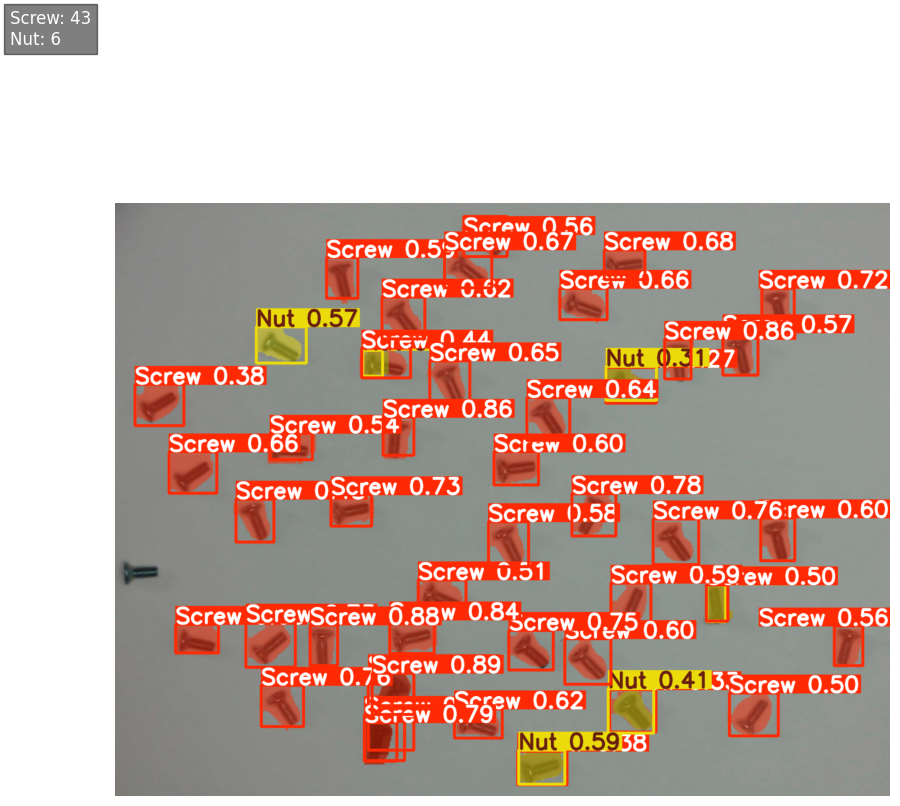

In [ ]:
# Extract the annotated image
annotated_img = results[0].plot(show=False, save=False)

# Extract class names
class_names = results[0].names

# Count detected classes
detected_classes = []
for result in results:
    classes = result.boxes.cls.tolist()  # convert tensors to a list of class IDs
    detected_classes.extend(classes)

class_counts = Counter(detected_classes)
class_labels = {int(cls): class_names[int(cls)] for cls in class_counts.keys()}

# Create the count text
count_text = "\n".join([f"{class_labels[int(cls)]}: {count}" for cls, count in class_counts.items()])

# Plot using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(annotated_img)
plt.axis('off')

# Annotate the image with class counts
plt.gcf().text(0.02, 0.95, count_text, fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5))

plt.show()